In [1]:
import pandas as pd
import numpy as np

In [2]:
ca = pd.read_csv('CAvideos.csv')
gb = pd.read_csv('GBvideos.csv')
us = pd.read_csv('USvideos.csv')

In [3]:
ca['category_id'].nunique() ##seeing how many unique category id there are

17

In [3]:
timedate_split = ca['publish_time'].str.split('T', 1)
ca['date'] = timedate_split.str.get(0)
ca['time'] = timedate_split.str.get(1)
## extracting date and time from publish_time column, they were both in one column, had to split into new columns

In [4]:
ca['date'] = pd.to_datetime(ca['date'], format="%Y-%m-%d")
## changing date info to actual date data type

In [5]:
ca.dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
date                      datetime64[ns]
time                              object
dtype: object

In [6]:
ca['month'] = ca['date'].dt.month
ca['day_of_week'] = ca['date'].dt.dayofweek
## extracting month and day of week from date

In [35]:
ca.dtypes

video_id                          object
trending_date                     object
title                             object
channel_title                     object
category_id                        int64
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
date                      datetime64[ns]
time                              object
year                               int64
month                              int64
day_of_week                        int64
newtime                           object
dtype: object

In [36]:
gb.head()
timedate_split = ca['publish_time'].str.split('T', 1)
ca['date'] = timedate_split.str.get(0)
ca['time'] = timedate_split.str.get(1)
ca['date'] = pd.to_datetime(ca['date'], format="%Y%m%d")

ValueError: time data '2017-11-10' does not match format '%Y%m%d' (match)

In [37]:
us.head()
timedate_split = ca['publish_time'].str.split('T', 1)
ca['date'] = timedate_split.str.get(0)
ca['time'] = timedate_split.str.get(1)
ca['date'] = pd.to_datetime(item['date'], format="%Y%m%d")

NameError: name 'item' is not defined

In [38]:
ca["comments_disabled"] = ca["comments_disabled"].astype('category').cat.codes
ca["ratings_disabled"] = ca["ratings_disabled"].astype('category').cat.codes
ca["video_error_or_removed"] = ca["video_error_or_removed"].astype('category').cat.codes
## converting categorical/ true or false columns into categorically coded variables

In [39]:
ca.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,year,month,day_of_week,newtime
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-10,17:00:03.000Z,2017,11,4,17:00:03
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,0,0,0,STill got a lot of packages. Probably will las...,2017-11-13,17:00:00.000Z,2017,11,0,17:00:00
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24.000Z,2017,11,6,19:05:24
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,0,0,0,I know it's been a while since we did this sho...,2017-11-12,18:01:41.000Z,2017,11,6,18:01:41
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,0,0,0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017-11-09,11:04:14.000Z,2017,11,3,11:04:14


In [40]:
ca['new_tags'] = ca[['tags']].applymap(lambda x: str.count(x, '|'))
## trying to make tags column more usable by making it into a count of tags column

In [1]:
ca['new_tags'] = ca['new_tags']+1
## had to add one to the count for tags because of the element we counted 

NameError: name 'ca' is not defined

In [42]:
ca = ca.drop(['video_id', 'category_id','publish_time','date','time', 'tags', ], axis=1)
## dropping columns we did not feel we could use

In [43]:
ca['title_count'] = ca[['title']].applymap(lambda x: str.count(x, ' '))
## ## trying to make title column more usable by making it into a count of title column

In [44]:
ca['desc_count'] = ca[['description']].applymap(lambda x: str.count(x, ' '))
## trying to make description column more usable by making it into a count of description words column

TypeError: ("descriptor 'count' requires a 'str' object but received a 'float'", 'occurred at index description')

In [45]:
ca['title_count'] = ca['title_count']+1
## had to add one to the column because of the element that was counted

In [46]:
ca.head()

,trending_date,title,channel_title,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,year,month,day_of_week,newtime,new_tags,title_count
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...,2017,11,4,17:00:03,6,8
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0,0,0,STill got a lot of packages. Probably will las...,2017,11,0,17:00:00,11,6
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017,11,6,19:05:24,23,10
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,0,I know it's been a while since we did this sho...,2017,11,6,18:01:41,14,5
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,0,0,0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017,11,3,11:04:14,10,7


In [47]:
ca.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,year,month,day_of_week,new_tags,title_count
views,1.000000,0.828964,0.557621,0.693107,0.004424,0.005745,0.001928,-0.011025,0.020280,-0.006254,0.002595,0.000861
likes,0.828964,1.000000,0.460427,0.836585,-0.023057,-0.024729,0.001953,-0.018383,0.028157,0.005652,-0.029110,-0.070720
dislikes,0.557621,0.460427,1.000000,0.643494,-0.005282,-0.008762,0.000636,-0.025754,0.029236,-0.006618,0.030050,-0.007860
comment_count,0.693107,0.836585,0.643494,1.000000,-0.028109,-0.016602,0.003117,-0.017119,0.025185,0.005468,-0.000052,-0.058303
comments_disabled,0.004424,-0.023057,-0.005282,-0.028109,1.000000,0.147903,-0.003092,0.012608,-0.014315,-0.007402,-0.062251,0.030961
ratings_disabled,0.005745,-0.024729,-0.008762,-0.016602,0.147903,1.000000,-0.002131,-0.007776,0.006077,0.010386,0.042635,-0.014388
video_error_or_removed,0.001928,0.001953,0.000636,0.003117,-0.003092,-0.002131,1.000000,0.011746,-0.011958,-0.002052,-0.019073,-0.023885
year,-0.011025,-0.018383,-0.025754,-0.017119,0.012608,-0.007776,0.011746,1.000000,-0.866007,-0.011332,0.011337,0.028455
month,0.020280,0.028157,0.029236,0.025185,-0.014315,0.006077,-0.011958,-0.866007,1.000000,0.012266,0.004612,-0.010296
day_of_week,-0.006254,0.005652,-0.006618,0.005468,-0.007402,0.010386,-0.002052,-0.011332,0.012266,1.000000,0.014068,-0.005419


In [57]:
from statsmodels.formula.api import ols

In [58]:
import matplotlib.pyplot as plt

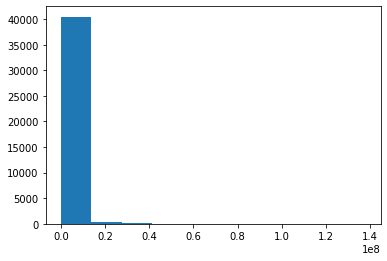

In [50]:
plt.hist(ca['views'])
plt.show()
## checking distribution of variables

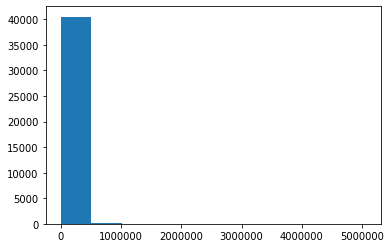

In [51]:
plt.hist(ca['likes'])
plt.show()
## checking distribution of variables

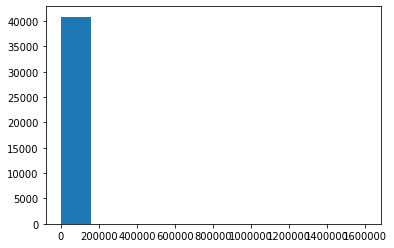

In [52]:
plt.hist(ca['dislikes'])
plt.show()
## checking distribution of variables

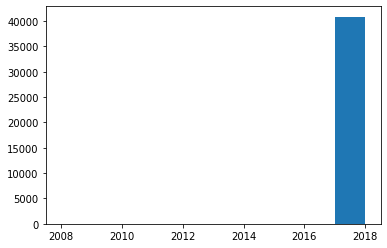

In [53]:
plt.hist(ca['year'])
plt.show()
## checking distribution of variables

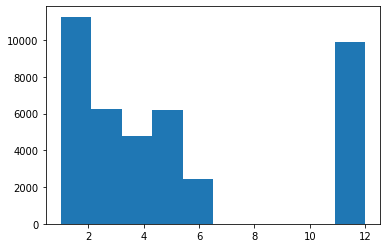

In [54]:
plt.hist(ca['month'])
plt.show()
## checking distribution of variables

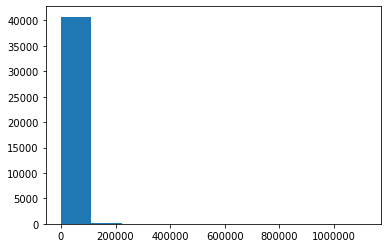

In [24]:
plt.hist(ca['comment_count'])
plt.show()
## checking distribution of variables

In [55]:
ca['ln_views'] = np.log(ca['views']+1)
ca['ln_likes'] = np.log(ca['likes']+1)
ca['ln_dislikes'] = np.log(ca['dislikes']+1)
ca['ln_comment_count'] = np.log(ca['comment_count']+1)
ca['ln_year'] = np.log(ca['year']+1)
ca['ln_month'] = np.log(ca['month']+1)
## log transforming variables to achieve normally distributed variables

In [56]:
ca.head()

,trending_date,title,channel_title,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,day_of_week,newtime,new_tags,title_count,ln_views,ln_likes,ln_dislikes,ln_comment_count,ln_year,ln_month
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,0,0,...,4,17:00:03,6,8,16.658009,13.576525,10.678698,11.743108,7.609862,2.484907
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,0,0,...,0,17:00:00,11,6,13.830056,11.758183,7.431892,9.475086,7.609862,2.484907
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,0,0,...,6,19:05:24,23,10,14.975981,11.891608,8.582981,9.009692,7.609862,2.484907
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,0,0,...,6,18:01:41,14,5,14.555460,11.792374,7.595890,9.771041,7.609862,2.484907
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,0,0,...,3,11:04:14,10,7,17.327761,14.306622,9.956222,11.351206,7.609862,2.484907


In [59]:
linreg = ols('ln_views ~ ln_likes + ln_dislikes + ln_comment_count + ln_year + ln_month + video_error_or_removed + comments_disabled + ratings_disabled + new_tags + title_count', data = ca).fit()
linreg.summary()
## linear regression to forecast estimated views for given video

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_views   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 1.988e+04
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:51:21   Log-Likelihood:                -38668.
No. Observations:               40881   AIC:                         7.736e+04
Df Residuals:                   40870   BIC:                         7.745e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 27.4634    157.389      0.174      0.861    -281.023     335.950
ln_likes                   0.3136      0.003     92.371      0.000       0.307       0.320
ln_dislikes                0.5185      0.003    166.189      0.000       0.512       0.525
ln_comment_count          -0.0629      0.004    -16.872      0.000      -0.070      -0.056
ln_year                   -2.6557     20.680     -0.128      0.898     -43.189      37.878
ln_month                   0.0030      0.008      0.389      0.697      -0.012       0.018
video_error_or_removed     0.4591      0.120      3.825      0.000       0.224       0.694
comments_disabled         -0.3095      0.035     -8.932      0.000      -0.377      -0.242
ratings_disabled           5.0649      0.045    111.826      0.000       4.976       5.154
new_tags                   0.0009      0.000      3.647      0.000       0.000       0.001
title_count                0.0204      0.001     27.349      0.000       0.019       0.022
==============================================================================
Omnibus:                     1999.309   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7527.281
Skew:                          -0.008   Prob(JB):                         0.00
Kurtosis:                       5.102   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
linreg = ols('ln_views ~ ln_likes + ln_dislikes + ln_comment_count', data = ca).fit()
linreg.summary()
## linear regression to forecast estimated views for given video

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_views   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 4.545e+04
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:51:26   Log-Likelihood:                -44837.
No. Observations:               40881   AIC:                         8.968e+04
Df Residuals:                   40877   BIC:                         8.972e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.0732      0.016    506.874      0.000       8.042       8.104
ln_likes             0.1579      0.003     46.040      0.000       0.151       0.165
ln_dislikes          0.5161      0.003    148.540      0.000       0.509       0.523
ln_comment_count     0.0544      0.003     17.338      0.000       0.048       0.061
==============================================================================
Omnibus:                    16748.982   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           326641.971
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                      16.524   Cond. No.                         58.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
linreg = ols('ln_likes ~ video_error_or_removed', data = ca).fit()
linreg.summary()
## linear regression to forecast estimated likes for given video

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_likes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.352
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.245
Time:                        15:51:27   Log-Likelihood:                -88249.
No. Observations:               40881   AIC:                         1.765e+05
Df Residuals:                   40879   BIC:                         1.765e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.8906      0.010    857.571      0.000       8.870       8.911
video_error_or_removed    -0.4691      0.403     -1.163      0.245      -1.260       0.322
==============================================================================
Omnibus:                     4412.200   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8318.933
Skew:                          -0.719   Prob(JB):                         0.00
Kurtosis:                       4.678   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
linreg = ols('ln_dislikes ~ video_error_or_removed', data = ca).fit()
linreg.summary()
## linear regression to forecast estimated dislikes for given video

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_dislikes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1501
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.698
Time:                        15:51:28   Log-Likelihood:                -83133.
No. Observations:               40881   AIC:                         1.663e+05
Df Residuals:                   40879   BIC:                         1.663e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.7210      0.009    625.402      0.000       5.703       5.739
video_error_or_removed    -0.1379      0.356     -0.387      0.698      -0.836       0.560
==============================================================================
Omnibus:                      508.959   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.997
Skew:                          -0.091   Prob(JB):                    2.66e-185
Kurtosis:                       3.683   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
linreg = ols('ln_comment_count ~ video_error_or_removed', data = ca).fit()
linreg.summary()
## linear regression to forecast estimated comments for given video

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       ln_comment_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1210
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.728
Time:                        15:51:29   Log-Likelihood:                -85129.
No. Observations:               40881   AIC:                         1.703e+05
Df Residuals:                   40879   BIC:                         1.703e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.0092      0.010    729.720      0.000       6.990       7.028
video_error_or_removed    -0.1300      0.374     -0.348      0.728      -0.863       0.603
==============================================================================
Omnibus:                     5337.186   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10658.784
Skew:                          -0.822   Prob(JB):                         0.00
Kurtosis:                       4.886   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
linreg = ols('ln_likes ~ comments_disabled', data = ca).fit()
linreg.summary()
## linear regression to forecast estimated likes for given video

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_likes   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     728.2
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          5.52e-159
Time:                        15:51:30   Log-Likelihood:                -87889.
No. Observations:               40881   AIC:                         1.758e+05
Df Residuals:                   40879   BIC:                         1.758e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.9236      0.010    862.446      0.000       8.903       8.944
comments_disabled    -2.3381      0.087    -26.985      0.000      -2.508      -2.168
==============================================================================
Omnibus:                     3776.036   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6713.578
Skew:                          -0.652   Prob(JB):                         0.00
Kurtosis:                       4.497   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
linreg = ols('ln_dislikes ~ comments_disabled', data = ca).fit()
linreg.summary()
## linear regression to forecast estimated dislikes for given video

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_dislikes   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     235.5
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           5.38e-53
Time:                        15:51:31   Log-Likelihood:                -83016.
No. Observations:               40881   AIC:                         1.660e+05
Df Residuals:                   40879   BIC:                         1.661e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.7377      0.009    624.740      0.000       5.720       5.756
comments_disabled    -1.1801      0.077    -15.345      0.000      -1.331      -1.029
==============================================================================
Omnibus:                      445.923   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              743.871
Skew:                          -0.063   Prob(JB):                    2.95e-162
Kurtosis:                       3.649   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
linreg = ols('ln_comment_count ~ comments_disabled', data = ca).fit()
linreg.summary()
## test. One would think a strong model would come from this. If there are no comments feature, comment count will be 0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       ln_comment_count   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     9500.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:51:32   Log-Likelihood:                -80858.
No. Observations:               40881   AIC:                         1.617e+05
Df Residuals:                   40879   BIC:                         1.617e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.1105      0.009    816.183      0.000       7.093       7.128
comments_disabled    -7.1105      0.073    -97.468      0.000      -7.254      -6.968
==============================================================================
Omnibus:                     1507.035   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2101.418
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       3.809   Cond. No.                         8.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
by_month = ca.groupby(['month'])['views'].sum().reset_index() 
## seeing video views by month

In [68]:
by_month

,month,views
0,1,5615972300
1,2,6241318931
2,3,6596207816
3,4,5428120257
4,5,8046080018
5,6,2736253422
6,7,2536355
7,8,1246732
8,9,8098136
9,10,22815422


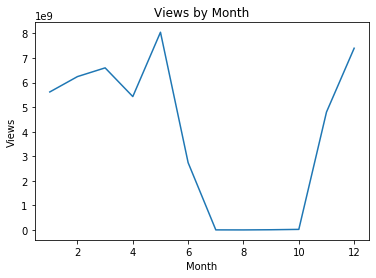

In [69]:
plt.plot(by_month['month'], by_month['views'])
plt.title('Views by Month')
plt.xlabel('Month')
plt.ylabel('Views')
plt.show()
## plotting video views by month. 

In [86]:
ca=ca.drop(['jan','feb','march','april','may','june','july','august','sept','oct','nov','dec',], axis=1)

In [91]:
ca = pd.get_dummies(ca['month'])
dummymonth.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [105]:
ca = ca.drop("1",axis=1)

KeyError: "['1'] not found in axis"

In [103]:
ca.head()

,1,2,3,4,5,6,7,8,9,10,...,ln_views,ln_year,month,new_tags,ratings_disabled,title,title_count,trending_date,video_error_or_removed,views
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.658009,7.609862,11.0,6.0,0.0,Eminem - Walk On Water (Audio) ft. Beyoncé,8.0,17.14.11,0.0,17158579.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.830056,7.609862,11.0,11.0,0.0,PLUSH - Bad Unboxing Fan Mail,6.0,17.14.11,0.0,1014651.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.975981,7.609862,11.0,23.0,0.0,"Racist Superman | Rudy Mancuso, King Bach & Le...",10.0,17.14.11,0.0,3191434.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.555460,7.609862,11.0,14.0,0.0,I Dare You: GOING BALD!?,5.0,17.14.11,0.0,2095828.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.327761,7.609862,11.0,10.0,0.0,Ed Sheeran - Perfect (Official Music Video),7.0,17.14.11,0.0,33523622.0


In [96]:
ca.shape

(81762, 32)